Train your own word2vec representations, as you did in the first example in this checkpoint. However, you need to experiment with the hyperparameters of the vectorization step. Modify the hyperparameters and run the classification models again. Can you wrangle any improvements?

In [2]:
import pandas as pd
import numpy as np
import nltk
import spacy
import gensim
import re
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 14.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [4]:
nltk.download('gutenberg')
from nltk.corpus import  gutenberg
print(gutenberg.fileids())

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [5]:
persuasion=gutenberg.raw('austen-persuasion.txt')
alice=gutenberg.raw('carroll-alice.txt')

In [6]:
# Utility function for standard text cleaning
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation that spaCy doesn't
    # recognize: the double dash --. Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = re.sub(r"(\b|\s+\-?|^\-?)(\d+|\d*\.\d+)\b", " ", text)
    text = ' '.join(text.split())
    return text

In [7]:
# The chapter indicator is idiosyncratic
persuasion = re.sub(r'Chapter \d+', '', persuasion)
alice = re.sub(r'CHAPTER .*', '', alice)
    
alice = text_cleaner(alice)
persuasion = text_cleaner(persuasion)

In [8]:
# Parse the cleaned novels. This can take some time.
nlp = spacy.load('en')
alice_doc = nlp(alice)
persuasion_doc = nlp(persuasion)

In [9]:
# Group into sentences
alice_sents = [[sent, "Carroll"] for sent in alice_doc.sents]
persuasion_sents = [[sent, "Austen"] for sent in persuasion_doc.sents]

# Combine the sentences from the two novels into one DataFrame
sentences = pd.DataFrame(alice_sents + persuasion_sents, columns = ["text", "author"])
sentences.head()

,text,author
0,"(Alice, was, beginning, to, get, very, tired, ...",Carroll
1,"(So, she, was, considering, in, her, own, mind...",Carroll
2,"(There, was, nothing, so, VERY, remarkable, in...",Carroll
3,"(Oh, dear, !)",Carroll
4,"(I, shall, be, late, !, ')",Carroll


In [10]:
# Get rid of stop words and punctuation,
# and lemmatize the tokens
for i, sentence in enumerate(sentences["text"]):
    sentences.loc[i, "text"] = [token.lemma_ for token in sentence if not token.is_punct and not token.is_stop]

In [11]:
# train word2vec on the the sentences
model_1 = gensim.models.Word2Vec(
    sentences["text"],
    workers=4,
    min_count=1,
    window=4,
    sg=0,
    sample=1e-3,
    size=100,
    hs=1
)

model_2 = gensim.models.Word2Vec(
    sentences["text"],
    workers=4,
    min_count=1,
    window=6,
    sg=0,
    sample=1e-3,
    size=100,
    hs=1
)

model_3 = gensim.models.Word2Vec(
    sentences["text"],
    workers=4,
    min_count=1,
    window=8,
    sg=0,
    sample=1e-3,
    size=100,
    hs=1
)

model_4 = gensim.models.Word2Vec(
    sentences["text"],
    workers=4,
    min_count=1,
    window=4,
    sg=0,
    sample=1e-3,
    size=200,
    hs=1
)

model_5 = gensim.models.Word2Vec(
    sentences["text"],
    workers=4,
    min_count=1,
    window=6,
    sg=0,
    sample=1e-3,
    size=200,
    hs=1
)

model_6 = gensim.models.Word2Vec(
    sentences["text"],
    workers=4,
    min_count=1,
    window=8,
    sg=0,
    sample=1e-3,
    size=200,
    hs=1
)

In [12]:
word2vec_arr1 = np.zeros((sentences.shape[0],100))
word2vec_arr2 = np.zeros((sentences.shape[0],100))
word2vec_arr3 = np.zeros((sentences.shape[0],100))
word2vec_arr4 = np.zeros((sentences.shape[0],200))
word2vec_arr5 = np.zeros((sentences.shape[0],200))
word2vec_arr6 = np.zeros((sentences.shape[0],200))

for i, sentence in enumerate(sentences["text"]):
    word2vec_arr1[i,:] = np.mean([model_1[lemma] for lemma in sentence], axis=0)
    word2vec_arr2[i,:] = np.mean([model_2[lemma] for lemma in sentence], axis=0)
    word2vec_arr3[i,:] = np.mean([model_3[lemma] for lemma in sentence], axis=0)
    word2vec_arr4[i,:] = np.mean([model_4[lemma] for lemma in sentence], axis=0)
    word2vec_arr5[i,:] = np.mean([model_5[lemma] for lemma in sentence], axis=0)
    word2vec_arr6[i,:] = np.mean([model_6[lemma] for lemma in sentence], axis=0)

word2vec_arr1 = pd.DataFrame(word2vec_arr1)
word2vec_arr2 = pd.DataFrame(word2vec_arr2)
word2vec_arr3 = pd.DataFrame(word2vec_arr3)
word2vec_arr4 = pd.DataFrame(word2vec_arr4)
word2vec_arr5 = pd.DataFrame(word2vec_arr5)
word2vec_arr6 = pd.DataFrame(word2vec_arr6)

sentences1 = pd.concat([sentences[["author", "text"]],word2vec_arr1], axis=1)
sentences1.dropna(inplace=True)

sentences2 = pd.concat([sentences[["author", "text"]],word2vec_arr2], axis=1)
sentences2.dropna(inplace=True)

sentences3 = pd.concat([sentences[["author", "text"]],word2vec_arr3], axis=1)
sentences3.dropna(inplace=True)

sentences4 = pd.concat([sentences[["author", "text"]],word2vec_arr4], axis=1)
sentences4.dropna(inplace=True)

sentences5 = pd.concat([sentences[["author", "text"]],word2vec_arr5], axis=1)
sentences5.dropna(inplace=True)

sentences6 = pd.concat([sentences[["author", "text"]],word2vec_arr6], axis=1)
sentences6.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Y1 = sentences1['author']
Y2 = sentences2['author']
Y3 = sentences3['author']
Y4 = sentences4['author']
Y5 = sentences5['author']
Y6 = sentences6['author']

X1 = np.array(sentences1.drop(['text','author'], 1))
X2 = np.array(sentences2.drop(['text','author'], 1))
X3 = np.array(sentences3.drop(['text','author'], 1))
X4 = np.array(sentences4.drop(['text','author'], 1))
X5 = np.array(sentences5.drop(['text','author'], 1))
X6 = np.array(sentences6.drop(['text','author'], 1))

# We split the dataset into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.4, random_state=123)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.4, random_state=123)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.4, random_state=123)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.4, random_state=123)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, Y5, test_size=0.4, random_state=123)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, Y6, test_size=0.4, random_state=123)

# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

print("-----------------------Word2vec Model 1------------------------------")
lr.fit(X_train1, y_train1)
rfc.fit(X_train1, y_train1)
gbc.fit(X_train1, y_train1)
print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train1, y_train1))
print('\nTest set score:', lr.score(X_test1, y_test1))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train1, y_train1))
print('\nTest set score:', rfc.score(X_test1, y_test1))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train1, y_train1))
print('\nTest set score:', gbc.score(X_test1, y_test1))

print("-----------------------Word2vec Model 2------------------------------")
lr.fit(X_train2, y_train2)
rfc.fit(X_train2, y_train2)
gbc.fit(X_train2, y_train2)
print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train2, y_train2))
print('\nTest set score:', lr.score(X_test2, y_test2))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train2, y_train2))
print('\nTest set score:', rfc.score(X_test2, y_test2))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train2, y_train2))
print('\nTest set score:', gbc.score(X_test2, y_test2))

print("-----------------------Word2vec Model 3------------------------------")
lr.fit(X_train3, y_train3)
rfc.fit(X_train3, y_train3)
gbc.fit(X_train3, y_train3)
print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train3, y_train3))
print('\nTest set score:', lr.score(X_test3, y_test3))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train3, y_train3))
print('\nTest set score:', rfc.score(X_test3, y_test3))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train3, y_train3))
print('\nTest set score:', gbc.score(X_test3, y_test3))

print("-----------------------Word2vec Model 4------------------------------")
lr.fit(X_train4, y_train4)
rfc.fit(X_train4, y_train4)
gbc.fit(X_train4, y_train4)
print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train4, y_train4))
print('\nTest set score:', lr.score(X_test4, y_test4))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train4, y_train4))
print('\nTest set score:', rfc.score(X_test4, y_test4))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train4, y_train4))
print('\nTest set score:', gbc.score(X_test4, y_test4))

print("-----------------------Word2vec Model 5------------------------------")
lr.fit(X_train5, y_train5)
rfc.fit(X_train5, y_train5)
gbc.fit(X_train5, y_train5)
print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train5, y_train5))
print('\nTest set score:', lr.score(X_test5, y_test5))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train5, y_train5))
print('\nTest set score:', rfc.score(X_test5, y_test5))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train5, y_train5))
print('\nTest set score:', gbc.score(X_test5, y_test5))

print("-----------------------Word2vec Model 6------------------------------")
lr.fit(X_train6, y_train6)
rfc.fit(X_train6, y_train6)
gbc.fit(X_train6, y_train6)
print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train6, y_train6))
print('\nTest set score:', lr.score(X_test6, y_test6))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train6, y_train6))
print('\nTest set score:', rfc.score(X_test6, y_test6))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train6, y_train6))
print('\nTest set score:', gbc.score(X_test6, y_test6))


-----------------------Word2vec Model 1------------------------------
----------------------Logistic Regression Scores----------------------
Training set score: 0.7598173515981735

Test set score: 0.769406392694064
----------------------Random Forest Scores----------------------
Training set score: 0.9917808219178083

Test set score: 0.8105022831050228
----------------------Gradient Boosting Scores----------------------
Training set score: 0.8864535768645357

Test set score: 0.8095890410958904
-----------------------Word2vec Model 2------------------------------
----------------------Logistic Regression Scores----------------------
Training set score: 0.7853881278538812

Test set score: 0.7917808219178082
----------------------Random Forest Scores----------------------
Training set score: 0.9917808219178083

Test set score: 0.8168949771689498
----------------------Gradient Boosting Scores----------------------
Training set score: 0.8983257229832572

Test set score: 0.8223744292237443
-

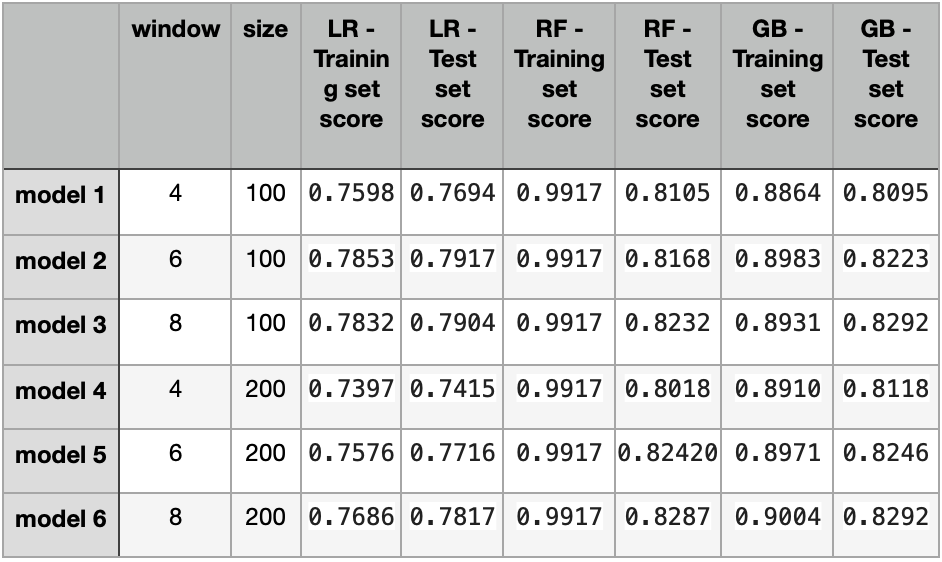

In Random forest we can see overfitting.

Increasing window and increasing size both lead to better scores in Gradient Boosting model.

In general increasing size and window results in better test scores.